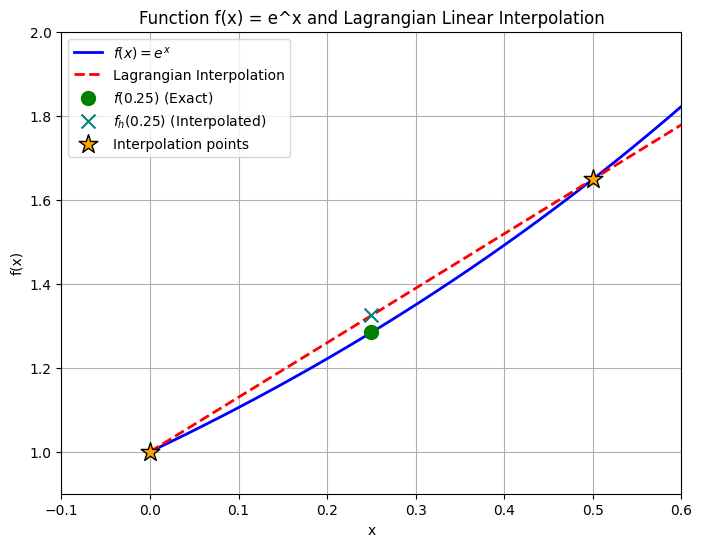

0.0403352186623227


In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = e^x
def f(x):
    return np.exp(x)

# Given points (x0, f(x0)) and (x1, f(x1))
x0 = 0
x1 = 0.5
f_x0 = f(x0)
f_x1 = f(x1)

# Define the Lagrangian linear interpolation function
def lagrange_interpolation(x, x0, x1, f_x0, f_x1):
    # Linear interpolation formula
    return (f_x0 * (x - x1) / (x0 - x1)) + (f_x1 * (x - x0) / (x1 - x0))

# Domain for plotting
x_vals = np.linspace(0, 2, 100)  # 100 points between 0 and 2 for a smooth plot
f_vals = f(x_vals)  # Evaluate the function f(x) = e^x at these points

# Perform Lagrangian interpolation on the same domain for comparison
interpolated_vals = lagrange_interpolation(x_vals, x0, x1, f_x0, f_x1)

# Plotting the function and interpolation
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label=r'$f(x) = e^x$', color='blue', linewidth=2)
plt.plot(x_vals, interpolated_vals, label=r'Lagrangian Interpolation', color='red', linestyle='--', linewidth=2)

# Point of interpolation at x = 0.25
x_interp = 0.25
y_interp = lagrange_interpolation(x_interp, x0, x1, f_x0, f_x1)
y_exact = f(x_interp)  # Real value of f(0.25)
# Mark the interpolation point at x = 0.25
plt.scatter(x_interp, y_exact, color='green', zorder=5, label=r'$f(0.25)$ (Exact)', s=100, marker='o')
plt.scatter(x_interp, y_interp, color='teal', zorder=5, label=r'$f_h(0.25)$ (Interpolated)', s=100, marker='x')

# Highlight the interpolation line between (x0, f(x0)) and (x1, f(x1))
plt.scatter([x0, x1], [f_x0, f_x1], color='orange', marker = '*',s = 200, edgecolors= "black",zorder=5, label='Interpolation points')

# Labels and title
plt.title('Function f(x) = e^x and Lagrangian Linear Interpolation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.ylim(.9,2)
plt.xlim(-.1,.6)
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
print(np.abs(y_exact-y_interp))

In [43]:
import sympy as sp

# Define the variable and points
x = sp.symbols('x')
x0, x1, x2, x3 = 0, 0.5, 1, 2
y0, y2, y3 = 0, 3, 2  # We know y1 is unknown and needs to be solved, but we'll test for y1 = 4/3

# Define Lagrange basis polynomials
L0 = ((x - x1)*(x - x2)*(x - x3)) / ((x0 - x1)*(x0 - x2)*(x0 - x3))
L1 = ((x - x0)*(x - x2)*(x - x3)) / ((x1 - x0)*(x1 - x2)*(x1 - x3))
L2 = ((x - x0)*(x - x1)*(x - x3)) / ((x2 - x0)*(x2 - x1)*(x2 - x3))
L3 = ((x - x0)*(x - x1)*(x - x2)) / ((x3 - x0)*(x3 - x1)*(x3 - x2))

# Define the polynomial P3(x) using y1 as a symbol
y1 = sp.symbols('y1')

P3 = y0 * L0 + y1 * L1 + y2 * L2 + y3 * L3

# Simplify P3
P3_simplified = sp.expand(P3)

# Extract the coefficient of x^3
coeff_x3 = P3_simplified.as_poly().coeffs()[3]  # This assumes the polynomial has x^3 term

# Now, we want to solve for y1 such that the coefficient of x^3 is 6
equation = sp.Eq(coeff_x3, 6)
y1_solution = sp.solve(equation, y1)

# Print the results
print("The simplified polynomial P3(x) is:", P3_simplified)
print("The coefficient of x^3 in P3(x) is:", coeff_x3)
print(f"The value of y1 that makes the coefficient of x^3 equal to 6 is: {y1_solution}")


The simplified polynomial P3(x) is: 2.66666666666667*x**3*y1 - 5.33333333333333*x**3 - 8.0*x**2*y1 + 14.0*x**2 + 5.33333333333333*x*y1 - 5.66666666666667*x
The coefficient of x^3 in P3(x) is: 14.0000000000000
The value of y1 that makes the coefficient of x^3 equal to 6 is: []
